In [65]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

# Cargamos el dataset
import pandas as pd
import chardet

file_path = "sic-avisos_recepcionados_2023.csv"
with open(file_path, "rb") as f:
    result = chardet.detect(f.read())

# Leer el archivo CSV utilizando la codificación detectada
df_avisos = pd.read_csv(file_path, encoding=result["encoding"], on_bad_lines="skip")





In [66]:
# Mostrar las primeras filas del DataFrame
df_avisos.head()
#TTTTTT

,TIPO_INCIDENCIA_ID,TIPO_INCIDENCIA,CANAL_DE_ENTRADA_ID,CANAL_DE_ENTRADA,FECHA_DE_RECEPCION,HORA_DE_RECEPCION,CATEGORIA_NIVEL1_ID,CATEGORIA_NIVEL1,CATEGORIA_NIVEL2_ID,CATEGORIA_NIVEL2,...,CALIFICADOR,DISTRITO_ID,DISTRITO,BARRIO_ID,BARRIO,CODIGO_POSTAL,COORDENADA_OFICIAL_X,COORDENADA_OFICIAL_Y,COORDENADA_REAL_X,COORDENADA_REAL_Y
0,0,Aviso,2.0,Android,01/01/2023,12:05:04,8,Limpieza y pintadas,201,Pintadas y grafitis,...,NaN,13,Puente De Vallecas,6,Numancia,28038,444063,4472716,444068,4472720
1,0,Aviso,1.0,010,01/01/2023,12:17:18,0,Cubos y contenedores,3,Vaciado de cubo o contenedor,...,NaN,13,Puente De Vallecas,2,San Diego,28053,443124,4471768,443132,4471769
2,0,Aviso,2.0,Android,01/01/2023,12:21:54,18,Retirada de elementos,21,Animales muertos,...,NaN,20,San Blas-Canillejas,4,Arcos,28037,447000,4474799,447000,4474799
3,0,Aviso,1.0,010,01/01/2023,12:40:58,18,Retirada de elementos,21,Animales muertos,...,NaN,13,Puente De Vallecas,3,Palomeras Bajas,28018,444035,4469950,444043,4469951
4,0,Aviso,1.0,010,01/01/2023,12:56:38,18,Retirada de elementos,21,Animales muertos,...,NaN,10,Latina,7,Las Aguilas,28044,434749,4471245,434757,4471246


In [67]:
# Conteo de valores perdidos/faltantes  
df_avisos.isna().sum()

TIPO_INCIDENCIA_ID           0
TIPO_INCIDENCIA              0
CANAL_DE_ENTRADA_ID        203
CANAL_DE_ENTRADA             0
FECHA_DE_RECEPCION           0
HORA_DE_RECEPCION            0
CATEGORIA_NIVEL1_ID          0
CATEGORIA_NIVEL1             0
CATEGORIA_NIVEL2_ID          0
CATEGORIA_NIVEL2             0
TIPO_VIAL                    0
NOMBRE_DE_VIAL               0
NUMERO                       0
CALIFICADOR             123478
DISTRITO_ID                  0
DISTRITO                     0
BARRIO_ID                    0
BARRIO                       0
CODIGO_POSTAL                0
COORDENADA_OFICIAL_X         0
COORDENADA_OFICIAL_Y         0
COORDENADA_REAL_X            0
COORDENADA_REAL_Y            0
dtype: int64

In [68]:
# El tamaño esperado para el dataset limpio
df_avisos.shape[0]

131829

In [69]:
# Consultamos los registros que tienen algún valor nulo
df_avisos.drop(df_avisos.dropna().index)

,TIPO_INCIDENCIA_ID,TIPO_INCIDENCIA,CANAL_DE_ENTRADA_ID,CANAL_DE_ENTRADA,FECHA_DE_RECEPCION,HORA_DE_RECEPCION,CATEGORIA_NIVEL1_ID,CATEGORIA_NIVEL1,CATEGORIA_NIVEL2_ID,CATEGORIA_NIVEL2,...,CALIFICADOR,DISTRITO_ID,DISTRITO,BARRIO_ID,BARRIO,CODIGO_POSTAL,COORDENADA_OFICIAL_X,COORDENADA_OFICIAL_Y,COORDENADA_REAL_X,COORDENADA_REAL_Y
0,0,Aviso,2.0,Android,01/01/2023,12:05:04,8,Limpieza y pintadas,201,Pintadas y grafitis,...,NaN,13,Puente De Vallecas,6,Numancia,28038,444063,4472716,444068,4472720
1,0,Aviso,1.0,010,01/01/2023,12:17:18,0,Cubos y contenedores,3,Vaciado de cubo o contenedor,...,NaN,13,Puente De Vallecas,2,San Diego,28053,443124,4471768,443132,4471769
2,0,Aviso,2.0,Android,01/01/2023,12:21:54,18,Retirada de elementos,21,Animales muertos,...,NaN,20,San Blas-Canillejas,4,Arcos,28037,447000,4474799,447000,4474799
3,0,Aviso,1.0,010,01/01/2023,12:40:58,18,Retirada de elementos,21,Animales muertos,...,NaN,13,Puente De Vallecas,3,Palomeras Bajas,28018,444035,4469950,444043,4469951
4,0,Aviso,1.0,010,01/01/2023,12:56:38,18,Retirada de elementos,21,Animales muertos,...,NaN,10,Latina,7,Las Aguilas,28044,434749,4471245,434757,4471246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131823,0,Aviso,2.0,Android,31/03/2023,10:38:29,18,Retirada de elementos,24,Recogida de saco o contenedor de escombros,...,NaN,11,Carabanchel,3,San Isidro,28019,438925,4472100,438935,4472123
131824,0,Aviso,1.0,010,31/03/2023,10:50:24,25,Arboles y parques,30,Incidencias de riego,...,NaN,19,Vicalvaro,3,Valderrivas,28032,448459,4472149,448459,4472149
131825,0,Aviso,8.0,iOS,31/03/2023,10:53:15,48,Alumbrado p�blico,50,Farola apagada,...,NaN,15,Ciudad Lineal,1,Ventas,28017,444751,4475849,444757,4475845
131827,0,Aviso,2.0,Android,31/03/2023,11:11:52,0,Cubos y contenedores,7,Horquillas delimitadoras,...,NaN,11,Carabanchel,7,Abrantes,28025,438168,4470226,438155,4470227


In [70]:
df_avisos_filt = df_avisos.dropna().reset_index(drop=True)
df_avisos_filt


,TIPO_INCIDENCIA_ID,TIPO_INCIDENCIA,CANAL_DE_ENTRADA_ID,CANAL_DE_ENTRADA,FECHA_DE_RECEPCION,HORA_DE_RECEPCION,CATEGORIA_NIVEL1_ID,CATEGORIA_NIVEL1,CATEGORIA_NIVEL2_ID,CATEGORIA_NIVEL2,...,CALIFICADOR,DISTRITO_ID,DISTRITO,BARRIO_ID,BARRIO,CODIGO_POSTAL,COORDENADA_OFICIAL_X,COORDENADA_OFICIAL_Y,COORDENADA_REAL_X,COORDENADA_REAL_Y
0,0,Aviso,8.0,iOS,01/01/2023,01:58:42,48,Alumbrado p�blico,51,Calle apagada,...,B,20,San Blas-Canillejas,5,Rosas,28022,448669,4474976,448685,4475039
1,0,Aviso,1.0,010,01/01/2023,06:34:18,8,Limpieza y pintadas,9,Limpieza en v�as p�blicas,...,A,15,Ciudad Lineal,2,Pueblo Nuevo,28017,446447,4475009,446454,4475010
2,0,Aviso,8.0,iOS,01/01/2023,09:03:50,55,Mobiliario urbano,60,Vallas,...,C,18,Villa De Vallecas,3,Ensanche De Vallecas,28051,449726,4467995,449694,4467999
3,0,Aviso,2.0,Android,01/01/2023,09:14:49,18,Retirada de elementos,24,Recogida de saco o contenedor de escombros,...,B,16,Hortaleza,6,Valdefuentes,28050,444649,4481699,444652,4481703
4,0,Aviso,2.0,Android,01/01/2023,09:23:30,25,Arboles y parques,27,Arbol en mal estado,...,A,18,Villa De Vallecas,3,Ensanche De Vallecas,28051,447512,4468660,447501,4468677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8346,1,Petici�n,2.0,Android,31/03/2023,08:06:24,70,Se�ales y sem�foros,72,Nueva se�al,...,A,13,Puente De Vallecas,6,Numancia,28038,443623,4472346,443624,4472342
8347,1,Petici�n,2.0,Android,31/03/2023,08:59:53,49,Alumbrado p�blico,52,Peticiones alumbrado,...,D,17,Villaverde,4,Los Rosales,28021,441366,4466613,441358,4466612
8348,0,Aviso,2.0,Android,31/03/2023,08:53:09,0,Cubos y contenedores,3,Vaciado de cubo o contenedor,...,G,19,Vicalvaro,4,El Ca�averal,28052,453592,4472169,453595,4472175
8349,0,Aviso,3.0,Canal web,31/03/2023,09:59:25,39,Calzadas y aceras,43,Desperfecto en acera,...,C,17,Villaverde,1,Villaverde Alto C.h.,28021,440033,4464854,440039,4464848


In [71]:
df_avisos_filt = df_avisos.dropna().reset_index(drop=True)
df_avisos_filt

,TIPO_INCIDENCIA_ID,TIPO_INCIDENCIA,CANAL_DE_ENTRADA_ID,CANAL_DE_ENTRADA,FECHA_DE_RECEPCION,HORA_DE_RECEPCION,CATEGORIA_NIVEL1_ID,CATEGORIA_NIVEL1,CATEGORIA_NIVEL2_ID,CATEGORIA_NIVEL2,...,CALIFICADOR,DISTRITO_ID,DISTRITO,BARRIO_ID,BARRIO,CODIGO_POSTAL,COORDENADA_OFICIAL_X,COORDENADA_OFICIAL_Y,COORDENADA_REAL_X,COORDENADA_REAL_Y
0,0,Aviso,8.0,iOS,01/01/2023,01:58:42,48,Alumbrado p�blico,51,Calle apagada,...,B,20,San Blas-Canillejas,5,Rosas,28022,448669,4474976,448685,4475039
1,0,Aviso,1.0,010,01/01/2023,06:34:18,8,Limpieza y pintadas,9,Limpieza en v�as p�blicas,...,A,15,Ciudad Lineal,2,Pueblo Nuevo,28017,446447,4475009,446454,4475010
2,0,Aviso,8.0,iOS,01/01/2023,09:03:50,55,Mobiliario urbano,60,Vallas,...,C,18,Villa De Vallecas,3,Ensanche De Vallecas,28051,449726,4467995,449694,4467999
3,0,Aviso,2.0,Android,01/01/2023,09:14:49,18,Retirada de elementos,24,Recogida de saco o contenedor de escombros,...,B,16,Hortaleza,6,Valdefuentes,28050,444649,4481699,444652,4481703
4,0,Aviso,2.0,Android,01/01/2023,09:23:30,25,Arboles y parques,27,Arbol en mal estado,...,A,18,Villa De Vallecas,3,Ensanche De Vallecas,28051,447512,4468660,447501,4468677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8346,1,Petici�n,2.0,Android,31/03/2023,08:06:24,70,Se�ales y sem�foros,72,Nueva se�al,...,A,13,Puente De Vallecas,6,Numancia,28038,443623,4472346,443624,4472342
8347,1,Petici�n,2.0,Android,31/03/2023,08:59:53,49,Alumbrado p�blico,52,Peticiones alumbrado,...,D,17,Villaverde,4,Los Rosales,28021,441366,4466613,441358,4466612
8348,0,Aviso,2.0,Android,31/03/2023,08:53:09,0,Cubos y contenedores,3,Vaciado de cubo o contenedor,...,G,19,Vicalvaro,4,El Ca�averal,28052,453592,4472169,453595,4472175
8349,0,Aviso,3.0,Canal web,31/03/2023,09:59:25,39,Calzadas y aceras,43,Desperfecto en acera,...,C,17,Villaverde,1,Villaverde Alto C.h.,28021,440033,4464854,440039,4464848


In [72]:
# Convertir la columna "FECHA_DE_RECEPCION" en un formato de fecha
df_avisos['FECHA_DE_RECEPCION'] = pd.to_datetime(df_avisos['FECHA_DE_RECEPCION'], format='%d/%m/%Y')

# Convertir la columna "HORA_DE_RECEPCION" a un tipo de dato de tiempo
df_avisos['HORA_DE_RECEPCION'] = pd.to_datetime(df_avisos['HORA_DE_RECEPCION'], format='%H:%M:%S').dt.time

# Combinar las columnas "FECHA_DE_RECEPCION" y "HORA_DE_RECEPCION" en una única columna de fecha y hora
df_avisos['FECHA_HORA_RECEPCION'] = pd.to_datetime(df_avisos['FECHA_DE_RECEPCION'].astype(str) + ' ' + df_avisos['HORA_DE_RECEPCION'].astype(str), format='%Y-%m-%d %H:%M:%S')
df_avisos.head()

,TIPO_INCIDENCIA_ID,TIPO_INCIDENCIA,CANAL_DE_ENTRADA_ID,CANAL_DE_ENTRADA,FECHA_DE_RECEPCION,HORA_DE_RECEPCION,CATEGORIA_NIVEL1_ID,CATEGORIA_NIVEL1,CATEGORIA_NIVEL2_ID,CATEGORIA_NIVEL2,...,DISTRITO_ID,DISTRITO,BARRIO_ID,BARRIO,CODIGO_POSTAL,COORDENADA_OFICIAL_X,COORDENADA_OFICIAL_Y,COORDENADA_REAL_X,COORDENADA_REAL_Y,FECHA_HORA_RECEPCION
0,0,Aviso,2.0,Android,2023-01-01,12:05:04,8,Limpieza y pintadas,201,Pintadas y grafitis,...,13,Puente De Vallecas,6,Numancia,28038,444063,4472716,444068,4472720,2023-01-01 12:05:04
1,0,Aviso,1.0,010,2023-01-01,12:17:18,0,Cubos y contenedores,3,Vaciado de cubo o contenedor,...,13,Puente De Vallecas,2,San Diego,28053,443124,4471768,443132,4471769,2023-01-01 12:17:18
2,0,Aviso,2.0,Android,2023-01-01,12:21:54,18,Retirada de elementos,21,Animales muertos,...,20,San Blas-Canillejas,4,Arcos,28037,447000,4474799,447000,4474799,2023-01-01 12:21:54
3,0,Aviso,1.0,010,2023-01-01,12:40:58,18,Retirada de elementos,21,Animales muertos,...,13,Puente De Vallecas,3,Palomeras Bajas,28018,444035,4469950,444043,4469951,2023-01-01 12:40:58
4,0,Aviso,1.0,010,2023-01-01,12:56:38,18,Retirada de elementos,21,Animales muertos,...,10,Latina,7,Las Aguilas,28044,434749,4471245,434757,4471246,2023-01-01 12:56:38


In [73]:
# Consultar las variables que son del tipo "string"
df_avisos_filt.dtypes[df_avisos_filt.dtypes=='object']

TIPO_INCIDENCIA       object
CANAL_DE_ENTRADA      object
FECHA_DE_RECEPCION    object
HORA_DE_RECEPCION     object
CATEGORIA_NIVEL1      object
CATEGORIA_NIVEL2      object
TIPO_VIAL             object
NOMBRE_DE_VIAL        object
CALIFICADOR           object
DISTRITO              object
BARRIO                object
dtype: object

In [74]:
df_avisos_filt["CATEGORIA_NIVEL1"].value_counts()

CATEGORIA_NIVEL1
Retirada de elementos                          2183
Cubos y contenedores                           1870
Limpieza y pintadas                            1252
Calzadas y aceras                               965
Arboles y parques                               650
Alumbrado p�blico                               385
Mobiliario urbano                               300
Aparcamiento regulado                           270
Se�ales y sem�foros                             148
Veh�culos abandonados. Retirada de veh�culo     138
Fuentes                                          88
Papeleras                                        70
Plagas                                           26
[DESACTIVADA] Bicicleta p�blica                   5
SYR                                               1
Name: count, dtype: int64

In [75]:
columnas_drop=["TIPO_INCIDENCIA","CANAL_DE_ENTRADA",           
  "CATEGORIA_NIVEL2", "HORA_DE_RECEPCION",     
     "CALIFICADOR", "DISTRITO",              
"BARRIO",]

In [76]:
# One-hot encoding de las columnas 'TIPO_VIAL' y 'NOMBRE_DE_VIAL'
tipo_vial_dummies = pd.get_dummies(df_avisos['TIPO_VIAL'], prefix='tipo_vial')
nombre_vial_dummies = pd.get_dummies(df_avisos['NOMBRE_DE_VIAL'], prefix='nombre_vial')

# Concatenar las columnas codificadas al DataFrame original
df_concact = pd.concat([df_avisos, tipo_vial_dummies, nombre_vial_dummies], axis=1)

# Eliminar las columnas originales 'TIPO_VIAL' y 'NOMBRE_DE_VIAL'
df_avisos_filt2 = df_concact.drop(['TIPO_VIAL', 'NOMBRE_DE_VIAL'], axis=1)



# Mostrar el DataFrame con las columnas codificadas
print(df_concact.head())


   TIPO_INCIDENCIA_ID TIPO_INCIDENCIA  CANAL_DE_ENTRADA_ID CANAL_DE_ENTRADA   
0                   0           Aviso                  2.0          Android  \
1                   0           Aviso                  1.0              010   
2                   0           Aviso                  2.0          Android   
3                   0           Aviso                  1.0              010   
4                   0           Aviso                  1.0              010   

  FECHA_DE_RECEPCION HORA_DE_RECEPCION  CATEGORIA_NIVEL1_ID   
0         2023-01-01          12:05:04                    8  \
1         2023-01-01          12:17:18                    0   
2         2023-01-01          12:21:54                   18   
3         2023-01-01          12:40:58                   18   
4         2023-01-01          12:56:38                   18   

        CATEGORIA_NIVEL1  CATEGORIA_NIVEL2_ID              CATEGORIA_NIVEL2   
0    Limpieza y pintadas                  201           Pintadas y 

In [77]:
df_avisos_filt2 = df_avisos_filt.drop(columns=columnas_drop)
print("Tamaño del tablón filtrado:", df_avisos_filt.shape)
print("Tamaño del tablón nuevo:", df_avisos_filt2.shape)

Tamaño del tablón filtrado: (8351, 23)
Tamaño del tablón nuevo: (8351, 16)


In [78]:
# Tipología de las variables exsitentes en el nuevo dataset
df_avisos_filt2.dtypes.value_counts()

int64      11
object      4
float64     1
Name: count, dtype: int64

In [79]:
#Tipología de las variables exsitentes en el nuevo dataset
df_avisos_filt2.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of TIPO_INCIDENCIA_ID        int64
CANAL_DE_ENTRADA_ID     float64
FECHA_DE_RECEPCION       object
CATEGORIA_NIVEL1_ID       int64
CATEGORIA_NIVEL1         object
CATEGORIA_NIVEL2_ID       int64
TIPO_VIAL                object
NOMBRE_DE_VIAL           object
NUMERO                    int64
DISTRITO_ID               int64
BARRIO_ID                 int64
CODIGO_POSTAL             int64
COORDENADA_OFICIAL_X      int64
COORDENADA_OFICIAL_Y      int64
COORDENADA_REAL_X         int64
COORDENADA_REAL_Y         int64
dtype: object>

In [80]:
# Consultar las variables que son del tipo "string"
df_avisos_filt2.dtypes[df_avisos_filt2.dtypes=='object']

FECHA_DE_RECEPCION    object
CATEGORIA_NIVEL1      object
TIPO_VIAL             object
NOMBRE_DE_VIAL        object
dtype: object

In [81]:
from sklearn.preprocessing import LabelEncoder
etiquetado = LabelEncoder()
etiquetado.fit(df_avisos_filt2['CATEGORIA_NIVEL1'])


LabelEncoder()

In [82]:
# Obtenemos las propiedades:
etiquetado.classes_

array(['Alumbrado p�blico', 'Aparcamiento regulado', 'Arboles y parques',
       'Calzadas y aceras', 'Cubos y contenedores', 'Fuentes',
       'Limpieza y pintadas', 'Mobiliario urbano', 'Papeleras', 'Plagas',
       'Retirada de elementos', 'SYR', 'Se�ales y sem�foros',
       'Veh�culos abandonados. Retirada de veh�culo',
       '[DESACTIVADA] Bicicleta p�blica'], dtype=object)

In [83]:
etiquetado.transform(df_avisos_filt2['CATEGORIA_NIVEL1'])

array([0, 6, 7, ..., 4, 3, 4])

In [84]:
# Generar la lista de features y la variable target
target = 'CATEGORIA_NIVEL1'
features = [x for x in df_avisos_filt2.columns if x!=target]

print(target)
print(features)

CATEGORIA_NIVEL1
['TIPO_INCIDENCIA_ID', 'CANAL_DE_ENTRADA_ID', 'FECHA_DE_RECEPCION', 'CATEGORIA_NIVEL1_ID', 'CATEGORIA_NIVEL2_ID', 'TIPO_VIAL', 'NOMBRE_DE_VIAL', 'NUMERO', 'DISTRITO_ID', 'BARRIO_ID', 'CODIGO_POSTAL', 'COORDENADA_OFICIAL_X', 'COORDENADA_OFICIAL_Y', 'COORDENADA_REAL_X', 'COORDENADA_REAL_Y']


In [85]:
# Consultar la variable de salida
df_avisos_filt2[target]

0           Alumbrado p�blico
1         Limpieza y pintadas
2           Mobiliario urbano
3       Retirada de elementos
4           Arboles y parques
                ...          
8346      Se�ales y sem�foros
8347        Alumbrado p�blico
8348     Cubos y contenedores
8349        Calzadas y aceras
8350     Cubos y contenedores
Name: CATEGORIA_NIVEL1, Length: 8351, dtype: object

In [86]:
# Eliminar las columnas de fecha y hora de la lista de características
features = [col for col in features if col not in ['FECHA_DE_RECEPCION', 'HORA_DE_RECEPCION', 'FECHA_HORA_RECEPCION']]

# Obtener las variables categóricas en el conjunto de datos
categorical_cols = df_avisos_filt2[features].select_dtypes(include=['object']).columns

# Convertir las variables categóricas en variables binarias (one-hot encoding)
df_avisos_filt2 = pd.get_dummies(df_avisos_filt2, columns=categorical_cols)

# Actualizar la lista de características para incluir las nuevas columnas binarias creadas
features = [col for col in df_avisos_filt2.columns if col != target]


In [87]:

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Eliminar las columnas de fecha de la lista de características
features = [col for col in features if col not in ['FECHA_DE_RECEPCION', 'HORA_DE_RECEPCION', 'FECHA_HORA_RECEPCION']]

# Asumiendo que df_avisos_filt2 es tu DataFrame, features es la lista de columnas de características y target es el nombre de la columna objetivo

# Comprobar si la columna objetivo contiene solo datos numéricos
is_target_numeric = pd.to_numeric(df_avisos_filt2[target], errors='coerce').notna().all()

if is_target_numeric:
    # Si la columna objetivo es numérica, eliminar filas con valores no numéricos
    df_avisos_filt2 = df_avisos_filt2[pd.to_numeric(df_avisos_filt2[target], errors='coerce').notna()]

    # Asignar el algoritmo e indicar la profundidad máxima del árbol (con un número rotundamente grande para sobreajustar)
    arbol_importancia = DecisionTreeRegressor(max_depth=len(features) + 10, random_state=100)

else:
    # Si la columna objetivo es categórica, codificarla con valores numéricos
    encoder = LabelEncoder()
    df_avisos_filt2[target] = encoder.fit_transform(df_avisos_filt2[target])

    # Asignar el algoritmo e indicar la profundidad máxima del árbol (con un número rotundamente grande para sobreajustar)
    arbol_importancia = DecisionTreeClassifier(max_depth=len(features) + 10, random_state=100)

# Entrenar el árbol con todo el conjunto de datos
arbol_importancia.fit(X=df_avisos_filt2[features], y=df_avisos_filt2[target])




DecisionTreeClassifier(max_depth=1847, random_state=100)

In [88]:
# Comprobamos que se obtiene un R^2 muy alto. Lo desesable es que sea 1.
y_pred_arbol = arbol_importancia.predict(X=df_avisos_filt2[features])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_avisos_filt2[target], y_pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_avisos_filt2[target], y_pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_avisos_filt2[target], y_pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_avisos_filt2[target], y_pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_avisos_filt2[target], y_pred_arbol))

Mean Absolute Error: 0.0
Mean Absolute Percentage Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R^2 coefficient of determination: 1.0


In [89]:
# Importancias de cada variable en el árbol ajustado (Gini importance)
arbol_importancia.feature_importances_

array([0.        , 0.        , 0.89670931, ..., 0.        , 0.        ,
       0.        ])

In [90]:
df_avisos_filt2.head()

,TIPO_INCIDENCIA_ID,CANAL_DE_ENTRADA_ID,FECHA_DE_RECEPCION,CATEGORIA_NIVEL1_ID,CATEGORIA_NIVEL1,CATEGORIA_NIVEL2_ID,NUMERO,DISTRITO_ID,BARRIO_ID,CODIGO_POSTAL,...,NOMBRE_DE_VIAL_Yecora,NOMBRE_DE_VIAL_Yeros,NOMBRE_DE_VIAL_Yeserias,NOMBRE_DE_VIAL_Zabaleta,NOMBRE_DE_VIAL_Zacarias Homs,NOMBRE_DE_VIAL_Zarza,NOMBRE_DE_VIAL_Zarzuela,NOMBRE_DE_VIAL_Zazuar,NOMBRE_DE_VIAL_Zorzal,NOMBRE_DE_VIAL_Zurron
0,0,8.0,01/01/2023,48,0,51,12,20,5,28022,...,False,False,False,False,False,False,False,False,False,False
1,0,1.0,01/01/2023,8,6,9,152,15,2,28017,...,False,False,False,False,False,False,False,False,False,False
2,0,8.0,01/01/2023,55,7,60,36,18,3,28051,...,False,False,False,False,False,False,False,False,False,False
3,0,2.0,01/01/2023,18,10,24,11,16,6,28050,...,False,False,False,False,False,False,False,False,False,False
4,0,2.0,01/01/2023,25,2,27,16,18,3,28051,...,False,False,False,False,False,False,False,False,False,False


In [91]:
# Creamos un DataFrame con los datos de importancia
importancia = pd.DataFrame(arbol_importancia.feature_importances_, index=features, columns=["Importancia"])

# Ordenamos los datos
importancia.sort_values(by=importancia.columns[0], ascending=False, inplace=True)
importancia

,Importancia
CATEGORIA_NIVEL1_ID,0.896709
CATEGORIA_NIVEL2_ID,0.102799
COORDENADA_REAL_Y,0.000276
COORDENADA_OFICIAL_X,0.000215
TIPO_INCIDENCIA_ID,0.000000
...,...
NOMBRE_DE_VIAL_Espartinas,0.000000
NOMBRE_DE_VIAL_Esfinge,0.000000
NOMBRE_DE_VIAL_Escalona,0.000000
NOMBRE_DE_VIAL_Ervigio,0.000000


In [92]:
# Hacemos una copia del tablón filtrado para no trabajar sobre original
df_avisos_filt3 = df_avisos_filt2.copy()

# Crear la columna nueva "Escenario" y borrar la columna target antigua 'Calidad_NO2'
df_avisos_filt3["Escenario"] = np.where(df_avisos_filt3['CATEGORIA_NIVEL1']<df_avisos_filt3['CATEGORIA_NIVEL1'].quantile(0.33),0,1)

df_avisos_filt3.drop(['CATEGORIA_NIVEL1'], axis='columns', inplace=True)
df_avisos_filt3

,TIPO_INCIDENCIA_ID,CANAL_DE_ENTRADA_ID,FECHA_DE_RECEPCION,CATEGORIA_NIVEL1_ID,CATEGORIA_NIVEL2_ID,NUMERO,DISTRITO_ID,BARRIO_ID,CODIGO_POSTAL,COORDENADA_OFICIAL_X,...,NOMBRE_DE_VIAL_Yeros,NOMBRE_DE_VIAL_Yeserias,NOMBRE_DE_VIAL_Zabaleta,NOMBRE_DE_VIAL_Zacarias Homs,NOMBRE_DE_VIAL_Zarza,NOMBRE_DE_VIAL_Zarzuela,NOMBRE_DE_VIAL_Zazuar,NOMBRE_DE_VIAL_Zorzal,NOMBRE_DE_VIAL_Zurron,Escenario
0,0,8.0,01/01/2023,48,51,12,20,5,28022,448669,...,False,False,False,False,False,False,False,False,False,0
1,0,1.0,01/01/2023,8,9,152,15,2,28017,446447,...,False,False,False,False,False,False,False,False,False,1
2,0,8.0,01/01/2023,55,60,36,18,3,28051,449726,...,False,False,False,False,False,False,False,False,False,1
3,0,2.0,01/01/2023,18,24,11,16,6,28050,444649,...,False,False,False,False,False,False,False,False,False,1
4,0,2.0,01/01/2023,25,27,16,18,3,28051,447512,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8346,1,2.0,31/03/2023,70,72,33,13,6,28038,443623,...,False,False,False,False,False,False,False,False,False,1
8347,1,2.0,31/03/2023,49,52,11,17,4,28021,441366,...,False,False,False,False,False,False,False,False,False,0
8348,0,2.0,31/03/2023,0,3,201,19,4,28052,453592,...,False,False,False,False,False,False,False,False,False,1
8349,0,3.0,31/03/2023,39,43,16,17,1,28021,440033,...,False,False,False,False,False,False,False,False,False,0


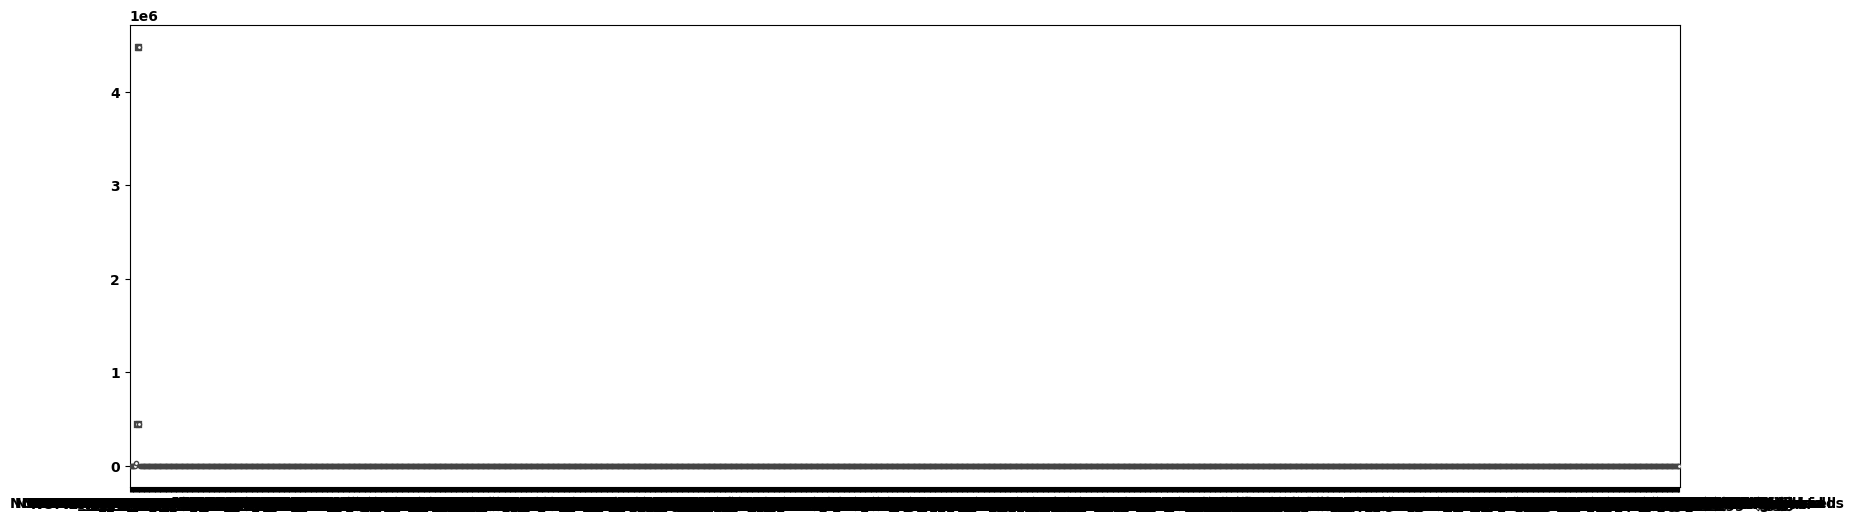

In [93]:
# Graficar la distribución de los valores originales
plt.figure(figsize=(20,6))
sns.violinplot(data=df_avisos_filt3, orient='v')
plt.show()

In [94]:
## Preparar el conjunto de datos del modelo

# Variables independientes (features)
X = df_avisos_filt3.drop('Escenario', axis='columns')

# Variable dependiente (target) que son los niveles de aire con menos contaminación
y = df_avisos_filt3['Escenario']

In [95]:
import pandas as pd

# Asumiendo que 'X' es un DataFrame de pandas
X['FECHA_DE_RECEPCION'] = pd.to_datetime(X['FECHA_DE_RECEPCION'], format='%d/%m/%Y', dayfirst=True)

# Extraer características numéricas de las fechas
X['year'] = X['FECHA_DE_RECEPCION'].dt.year
X['month'] = X['FECHA_DE_RECEPCION'].dt.month
X['day'] = X['FECHA_DE_RECEPCION'].dt.day

# Eliminar la columna original de fechas
X = X.drop('FECHA_DE_RECEPCION', axis=1)


In [96]:
# importar los objetos necesarios de la librería sklearn
from sklearn.preprocessing import StandardScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado = StandardScaler().fit(X)
dataset_normal = escalado.transform(X)
dataset_normal

array([[-0.17747404,  2.75320891,  1.00519887, ...,  0.        ,
        -1.22261312, -1.73854566],
       [-0.17747404, -0.60049672, -0.62278536, ...,  0.        ,
        -1.22261312, -1.73854566],
       [-0.17747404,  2.75320891,  1.29009611, ...,  0.        ,
        -1.22261312, -1.73854566],
       ...,
       [-0.17747404, -0.12139592, -0.9483822 , ...,  0.        ,
         1.18229612,  1.70130906],
       [-0.17747404,  0.35770489,  0.63890242, ...,  0.        ,
         1.18229612,  1.70130906],
       [-0.17747404, -0.60049672, -0.9483822 , ...,  0.        ,
         1.18229612,  1.70130906]])

In [97]:
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
X_normal = pd.DataFrame(dataset_normal, columns=X.columns)
print(type(X_normal))
X_normal

<class 'pandas.core.frame.DataFrame'>


,TIPO_INCIDENCIA_ID,CANAL_DE_ENTRADA_ID,CATEGORIA_NIVEL1_ID,CATEGORIA_NIVEL2_ID,NUMERO,DISTRITO_ID,BARRIO_ID,CODIGO_POSTAL,COORDENADA_OFICIAL_X,COORDENADA_OFICIAL_Y,...,NOMBRE_DE_VIAL_Zabaleta,NOMBRE_DE_VIAL_Zacarias Homs,NOMBRE_DE_VIAL_Zarza,NOMBRE_DE_VIAL_Zarzuela,NOMBRE_DE_VIAL_Zazuar,NOMBRE_DE_VIAL_Zorzal,NOMBRE_DE_VIAL_Zurron,year,month,day
0,-0.177474,2.753209,1.005199,0.291751,-0.191532,1.473279,0.578196,-0.609137,1.423107,0.015135,...,-0.010944,-0.010944,-0.010944,-0.010944,-0.015477,-0.010944,-0.021891,0.0,-1.222613,-1.738546
1,-0.177474,-0.600497,-0.622785,-0.589009,0.325784,0.607724,-0.887062,-0.956916,0.902303,0.022000,...,-0.010944,-0.010944,-0.010944,-0.010944,-0.015477,-0.010944,-0.021891,0.0,-1.222613,-1.738546
2,-0.177474,2.753209,1.290096,0.480486,-0.102849,1.127057,-0.398643,1.407984,1.670852,-1.437065,...,-0.010944,-0.010944,-0.010944,-0.010944,-0.015477,-0.010944,-0.021891,0.0,-1.222613,-1.738546
3,-0.177474,-0.121396,-0.215789,-0.274452,-0.195227,0.780835,1.066615,1.338429,0.480878,1.413665,...,-0.010944,-0.010944,-0.010944,-0.010944,-0.015477,-0.010944,-0.021891,0.0,-1.222613,-1.738546
4,-0.177474,-0.121396,0.069108,-0.211541,-0.176752,1.127057,-0.398643,1.407984,1.151923,-1.298730,...,-0.010944,-0.010944,-0.010944,-0.010944,-0.015477,-0.010944,-0.021891,0.0,-1.222613,-1.738546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8346,5.634627,-0.121396,1.900590,0.732132,-0.113935,0.261501,1.066615,0.503758,0.240398,-0.531962,...,-0.010944,-0.010944,-0.010944,-0.010944,-0.015477,-0.010944,-0.021891,0.0,1.182296,1.701309
8347,5.634627,-0.121396,1.045898,0.312722,-0.195227,0.953946,0.089776,-0.678693,-0.288609,-1.724551,...,-0.010944,-0.010944,-0.010944,-0.010944,-0.015477,-0.010944,-0.021891,0.0,1.182296,1.701309
8348,-0.177474,-0.121396,-0.948382,-0.714832,0.506844,1.300168,0.089776,1.477540,2.576986,-0.568782,...,-0.010944,-0.010944,-0.010944,-0.010944,-0.015477,-0.010944,-0.021891,0.0,1.182296,1.701309
8349,-0.177474,0.357705,0.638902,0.123987,-0.176752,0.953946,-1.375481,-0.678693,-0.601045,-2.090461,...,-0.010944,-0.010944,-0.010944,-0.010944,-0.015477,-0.010944,-0.021891,0.0,1.182296,1.701309


C:\Users\rodri\AppData\Local\Temp\ipykernel_21516\3131962263.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

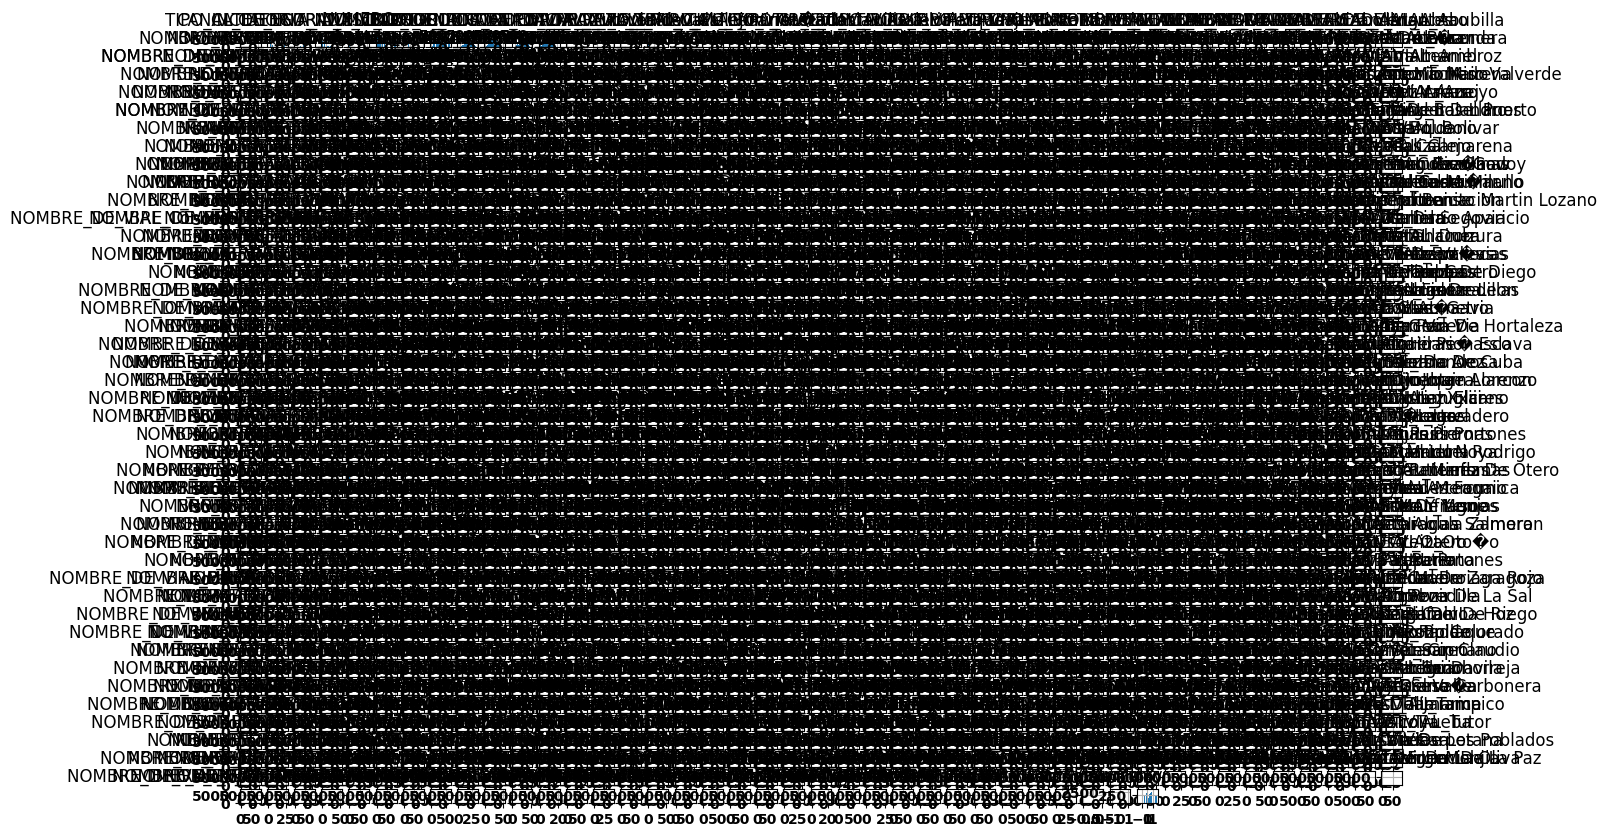

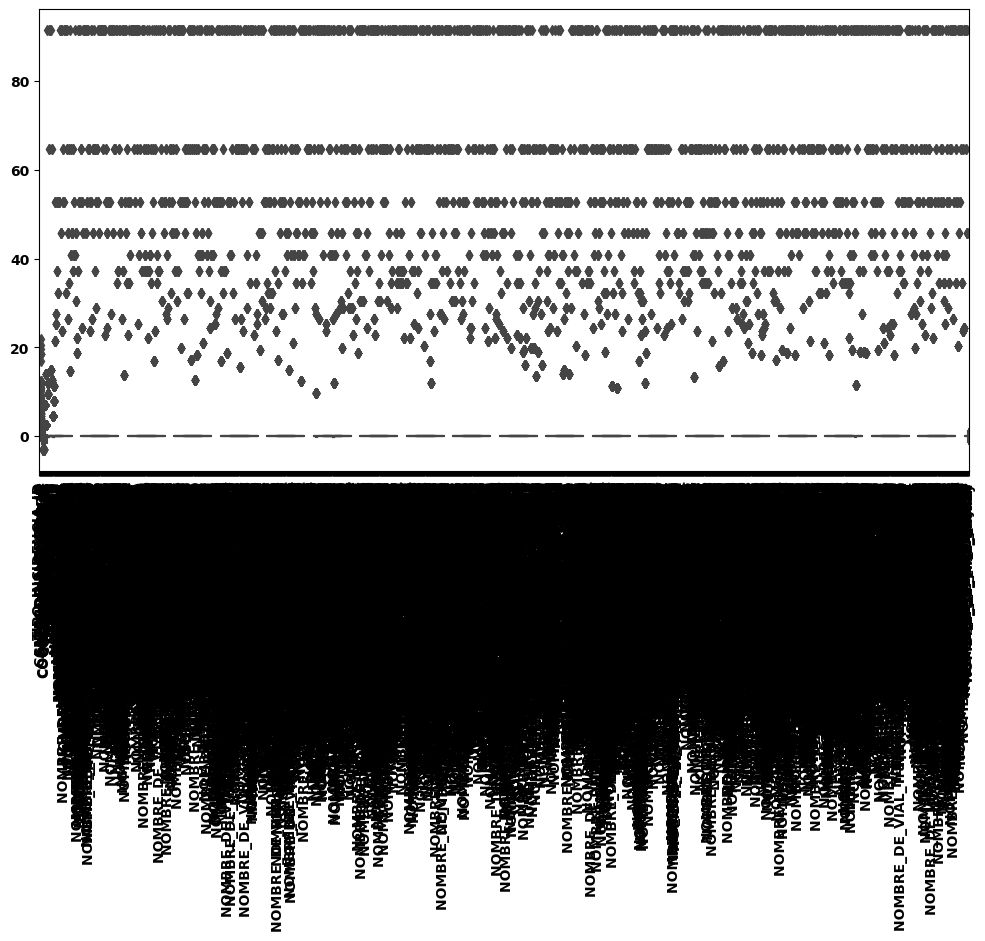

In [108]:
# Convertir el conjunto de datos estandarizado en un DataFrame de pandas
dataset_normal_df = pd.DataFrame(dataset_normal, columns=X.columns)

# Graficar histogramas
plt.figure(figsize=(12, 6))
dataset_normal_df.hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Graficar diagramas de caja (boxplots)
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset_normal_df)
plt.xticks(rotation=90)
plt.show()


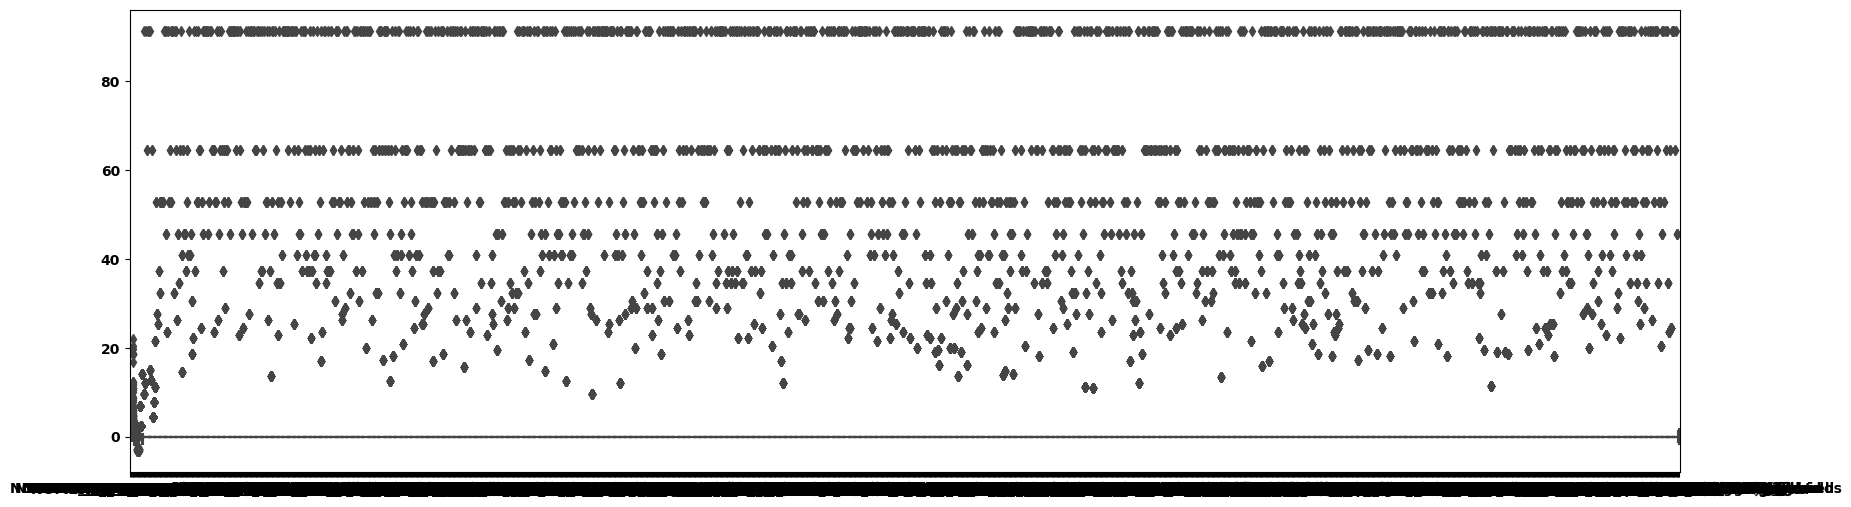

In [109]:
# Graficar la distribución de los valores estandarizados
plt.figure(figsize=(20,6))
sns.boxplot(data=X_normal,  orient='v')
plt.show()

In [99]:
# Separar los conjuntos de datos de entrenamiento (Training) y de prueba (Test) para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=88)

In [100]:
# "test_size" representa la proporción del conjunto de datos a incluir en la división de Test
print(X_train.shape[0])
print(X_test.shape[0])
X_train.shape[0] + X_test.shape[0]

6680
1671


8351

In [101]:
# Importar el módulo que corresponde al algoritmo
from sklearn.linear_model import LogisticRegression

# Asignar el algoritmo que vamos a aplicar 
log_r = LogisticRegression(max_iter=1000,
                           random_state=100)

# Entrenar el modelo

log_r.fit(X=X_train, y=y_train)

LogisticRegression(max_iter=1000, random_state=100)

In [102]:
# Calcular las predicciones con el conjunto de prueba
y_pred = log_r.predict(X_test)

# Imprimir la salida del modelo 
print(y_pred)

[0 0 1 ... 1 1 1]


In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7869539198084979

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.46      0.55       464
           1       0.82      0.91      0.86      1207

    accuracy                           0.79      1671
   macro avg       0.74      0.69      0.70      1671
weighted avg       0.77      0.79      0.77      1671



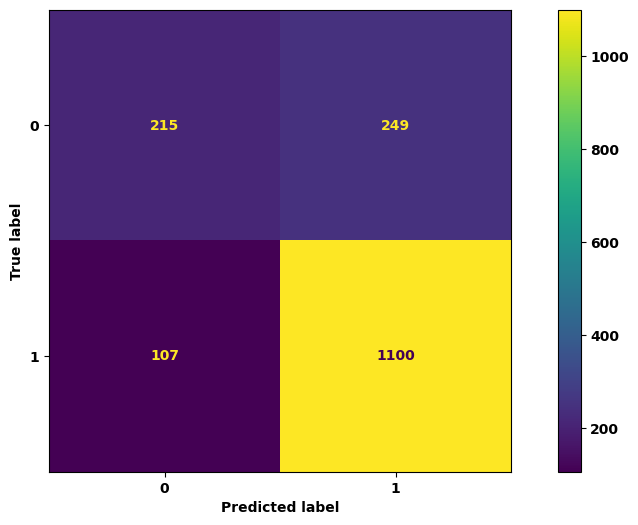

In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=log_r.classes_)
disp.plot()

plt.show()

In [106]:
# Calcular el área bajo la curva de funcionamiento del receptor
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6873562623203726

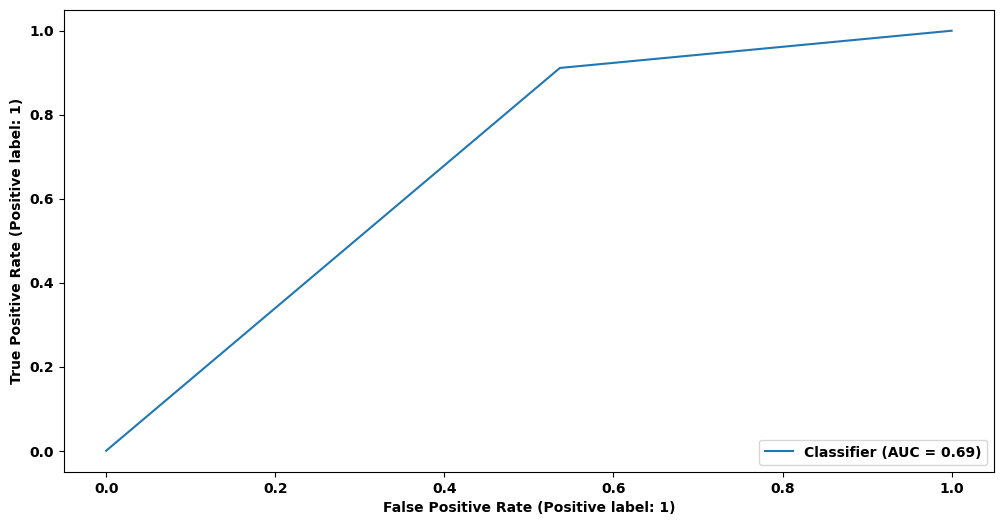

In [107]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show()